In [1]:
from new_examples.testgraph import Ein, Eout, Rin, Vtree, Ftree, Stree
from collections import OrderedDict
from graph.graphutils import draw_graph_graphical_props, flat_graph_formulation, Node, VAR, COMP, all_variables, all_components, all_varnodes, sources, default_nodetyperepr
from graph.mergegraph import split_graph, merged_graph, merge_graph, get_edges, subgraph_ins
from graph.nestedgraph import build_typedgraph
from graph.matrixview import render_incidence
import matplotlib

# Sandbox

In [2]:
import ipywidgets as widgets
def add_component(comp_name, Ein_comp, Eout_comp):
    t1= widgets.Text(
        value=','.join(map(str,Ein_comp)),
        description='{}:'.format(comp_name),
        disabled=False
    )
    t2 = widgets.Text(
        value=','.join(map(str,Eout_comp)),
        description='',
        disabled=False
    )
    b1 = widgets.ToggleButton(
        value=False,
        description='',
        disabled=False,
        button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Click me',
        icon='long-arrow-left' # (FontAwesome names without the `fa-` prefix)
    )
    b1b = widgets.ToggleButton(
        value=False,
        description='',
        disabled=False,
        button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Click me',
        icon='long-arrow-right' # (FontAwesome names without the `fa-` prefix)
    )
    b2 = widgets.ToggleButton(
        value=False,
        description='',
        disabled=False,
        button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Click me',
        icon='long-arrow-up' # (FontAwesome names without the `fa-` prefix)
    )
    b3 = widgets.ToggleButton(
        value=False,
        description='',
        disabled=False,
        button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Click me',
        icon='long-arrow-down' # (FontAwesome names without the `fa-` prefix)
    )
    return [t1, t2, b1, b1b, b2, b3]

argnames = ('Ein','Eout','btn1', 'btn1b', 'btn2', 'btn3')
interactive_widgets = dict()
arg_lookup = dict()
all_widgets = []
for comp_name, Ein_comp in Ein.items():
    wdgts = add_component(str(comp_name), Ein_comp, Eout[comp_name])
    all_widgets.append(wdgts)
    comp_name = str(comp_name)
    for idx, wdgt in enumerate(wdgts):
        arg_str = comp_name + argnames[idx]
        arg_lookup[arg_str] = (comp_name, argnames[idx])
        interactive_widgets[arg_str] = wdgt

comp_names = [str(elt) for elt in Ein.keys()]
click_left = {elt: False for elt in comp_names}
click_right = {elt: False for elt in comp_names}
click_up = {elt: False for elt in comp_names}
click_down = {elt: False for elt in comp_names}

def f(*args, **kwargs):
    global click_left, click_up, click_down
    global Ftree, Ein, Eout
    for key,val in kwargs.items():
        comp_name, argtype = arg_lookup[key]
        comp_id = int(comp_name)
        if argtype == 'Ein':
            Ein[comp_id] = tuple(map(int, val.split(',')))
        if argtype == 'Eout':
            Eout[comp_id] = tuple(int(elt) if elt != 'None' else None for elt in val.split(','))
        # print(Ein, Eout)
        if argtype == 'btn1' and val != click_left[comp_name]:
            click_left[comp_name] = val
            Ftree[comp_id] = max(1, Ftree[comp_id]-1)
        if argtype == 'btn1b' and val != click_right[comp_name]:
            click_right[comp_name] = val
            Ftree[comp_id] = Ftree[comp_id]+1
        if argtype == 'btn2' and val != click_up[comp_name]:
            click_up[comp_name] = val
            vals = list(Ftree.keys())
            idx = vals.index(int(comp_name))
            if idx > 0:
                vals[idx], vals[idx-1] = vals[idx-1], vals[idx]
            Ftree = OrderedDict(((elt,Ftree[elt]) for elt in vals))
            print('Ftree[{}] -1'.format(comp_name))
        if argtype == 'btn3' and val != click_down[comp_name]:
            click_down[comp_name] = val
            vals = list(Ftree.keys())
            idx = vals.index(int(comp_name))
            if idx < len(vals)-1:
                vals[idx], vals[idx+1] = vals[idx+1], vals[idx]
            Ftree = OrderedDict(((elt,Ftree[elt]) for elt in vals))
            print('Ftree[{}] +1 < max'.format(comp_name))
    print(Ftree)
    print(Ein, Eout)
    render_incidence((Ein, Eout, Rin), (Ftree, Stree, Vtree), hideticks=True, rawvarname=False, patchwidth=4, fontsize=22);
    graphs = build_typedgraph((Ein, Eout, Rin), (Ftree, Stree, Vtree))
    for key,graph in graphs.items():
        draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(7,2))

out = widgets.interactive_output(f, interactive_widgets) 
display(widgets.VBox([widgets.Box(wdgt) for wdgt in all_widgets]), out)

Output()

In [2]:
Ein = {
    1: (7,),
    2: (3,6),
    3: (1,),
    4: (2,4),
    5: (3,2)
}
Eout = {
    1: (6,),
    2: (1,),
    3: (2,), 
    4: (None,), # this gives us the size of the outputs
    5: (5,), # Use None to indicate the size of the output
}
Rin = {}
Ftree = OrderedDict((
    (1,1),
    (2,2),
    (3,2),
    (4,2),
    (5,1)
))
Stree = {
    2:1
}
Vtree = {
    3:2
}

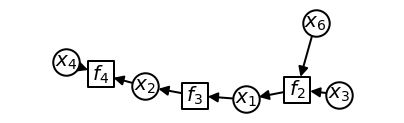

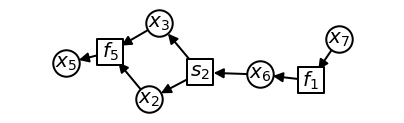

In [3]:
graphs = build_typedgraph((Ein, Eout, Rin), (Ftree, Stree, Vtree))
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(7,2))

# Detailed modularization

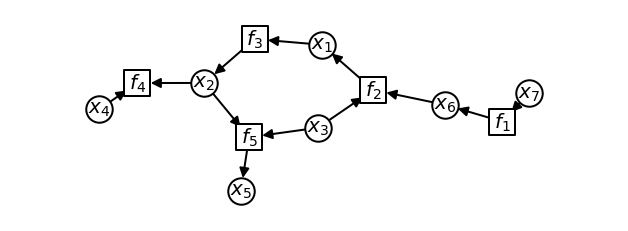

In [2]:
G = flat_graph_formulation(Ein, Eout, Rin)
draw_graph_graphical_props(G, prog='sfdp', figsize=(11,4))

In [3]:
cmap = matplotlib.cm.get_cmap('Pastel1')
def plot_subgraph(G, subgraph):
    colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): all_variables(*subgraph),
        matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
    draw_graph_graphical_props(G, colormap_subgraph, prog='sfdp', figsize=(11,4))

# Merge

In [4]:
typed_mergelts = {Node(3,COMP), Node(5, COMP)}
typed_mergelts = {Node(2,COMP),Node(3,COMP),Node(4,COMP)}
#typed_mergelts = {Node(1,COMP), Node(2,COMP), Node(3, COMP), Node(4,COMP)}

## Split graph

In [5]:
subgraph, mgraph = split_graph(G, typed_mergelts)

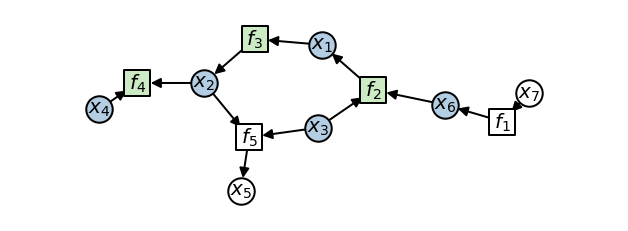

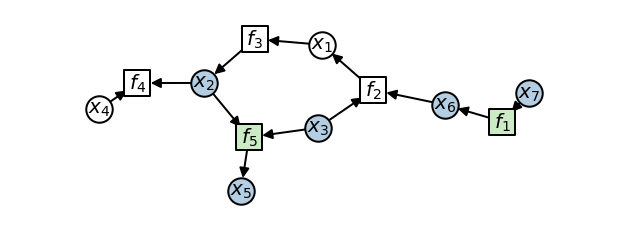

In [6]:
plot_subgraph(G, subgraph)
plot_subgraph(G, mgraph)

## Generate mergegraph

In [7]:
typed_solve_vars = {Node(3, VAR)}
merged_graph(subgraph, mgraph, 1, typed_solve_vars)

[(x_7, f_1),
 (x_3, f_5),
 (x_2, f_5),
 (f_1, x_6),
 (f_5, x_5),
 (x_6, s_1),
 (s_1, x_3),
 (s_1, x_2)]

## Mergegraph and subgraph

In [8]:
typed_mergelts = {Node(2,COMP),Node(3,COMP),Node(4,COMP)}
subgraph, mgraph = split_graph(G, typed_mergelts)

In [9]:
sources(*subgraph)-all_varnodes(mgraph[1]) #mgraph[1] corresponds to output variables

{x_3, x_4}

In [10]:
G_merge, G_sub = merge_graph(G, typed_mergelts, typed_solve_vars, solver_idx=1, exclude_unique_sources=False)

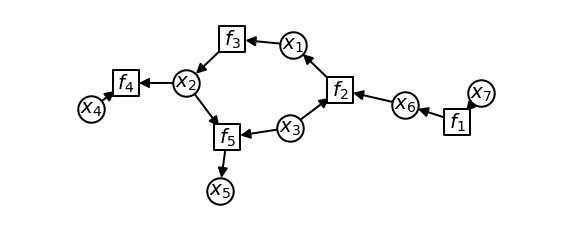

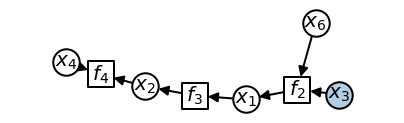

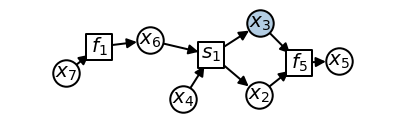

In [11]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G, prog='sfdp', figsize=(10,4))
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(7,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(7,2))

# Inputs at root level

In [12]:
Ein = {1: (1,), 2: (1,2,3)}
Eout = {1: (3,), 2: (4,)}
Rin = dict()

In [13]:
G = flat_graph_formulation(Ein, Eout, Rin)

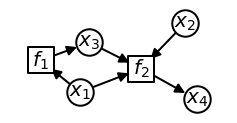

In [14]:
draw_graph_graphical_props(G, {}, prog='sfdp', figsize=(4,2))

In [15]:
typed_mergelts = {Node(2,COMP)}
typed_solve_vars = set()

In [16]:
subgraph, mgraph = split_graph(G, typed_mergelts)

In [17]:
mgraph

({f_1: {x_1}}, {f_1: {x_3}})

In [18]:
subgraph

({f_2: {x_1, x_2, x_3}}, {f_2: {x_4}})

In [19]:
sources(*subgraph)

{x_1, x_2, x_3}

In [20]:
subgraph_ins(subgraph, mgraph)

{x_1, x_3}

In [21]:
mgraph

({f_1: {x_1}}, {f_1: {x_3}})

In [22]:
G_merge, G_sub = merge_graph(G, typed_mergelts, typed_solve_vars, solver_idx=1)

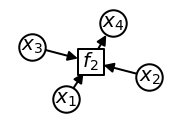

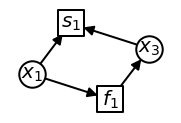

In [23]:
colormap_subgraph = {
        matplotlib.colors.rgb2hex(cmap(0.2)): typed_solve_vars,
        #matplotlib.colors.rgb2hex(cmap(0.3)): all_components(subgraph[0])
    }
draw_graph_graphical_props(G_sub, colormap_subgraph, prog='sfdp', figsize=(3,2))
draw_graph_graphical_props(G_merge, colormap_subgraph, prog='sfdp', figsize=(3,2))

# Graph from tree

In [24]:
from graph.nestedgraph import typed_solver_children, level_order_tree, SOLVER, COMP, VAR
from new_examples.testgraph import Ein, Eout, Rin, Vtree, Ftree, Stree

In [25]:
graphs = build_typedgraph((Ein, Eout, Rin), (Ftree, Stree, Vtree))

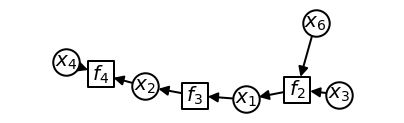

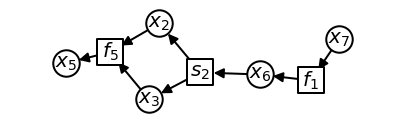

In [26]:
for key,graph in graphs.items():
    draw_graph_graphical_props(graph, {}, prog='sfdp', figsize=(7,2))

In [27]:
from graph.graphutils import dfs_tree, nested_sources

Stree = {
    5: 3,
    2: 1,
    3: 2,
    4: 2,
    6: 1
}

dfs_tree(Stree, 1)

{1, 2, 3, 4, 5, 6}